# Data Outliers

Data is not always "clean". Perhaps there is a stochastic process that drifts into an anamolous state; or perhaps data is just spotty and the NaN practices lead to wrongful values in the data. Let us detect outliers

## Data errors

In [1]:
import requests, zipfile, StringIO

# Let us read the air quality dataset from UCI -- https://archive.ics.uci.edu/ml/datasets/Air+Quality
uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# Read the data from the web
air_quality = pd.read_excel(zipfile.ZipFile(StringIO.StringIO(requests.get(uri).content)).open('AirQualityUCI.xlsx'))

# Display a preview of the data
display(air_quality)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


## Turn to a Time Series

In [2]:
# Create time index
air_quality_ts = air_quality.copy()

# Convert date and time into string forms
air_quality_ts['Date'] = air_quality_ts.Date.astype('str')
air_quality_ts['Time'] = air_quality_ts.Time.astype('str')

# Create a Datetime column
air_quality_ts['datetime'] = air_quality_ts.apply(lambda x : pd.to_datetime(x.Date + ' ' + x.Time), axis=1)

# Change the index into a time series
air_quality_ts.set_index('datetime', inplace=True)

# Drop Date and Time since we already have the index
air_quality_ts.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert everything to numeric datatype
air_quality_ts = air_quality_ts.astype('float')

# Display a preview
display(air_quality_ts)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,-200.0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04 11:00:00,2.4,1162.50,-200.0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04 12:00:00,2.4,1142.00,-200.0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


# Visually spot "outliers"

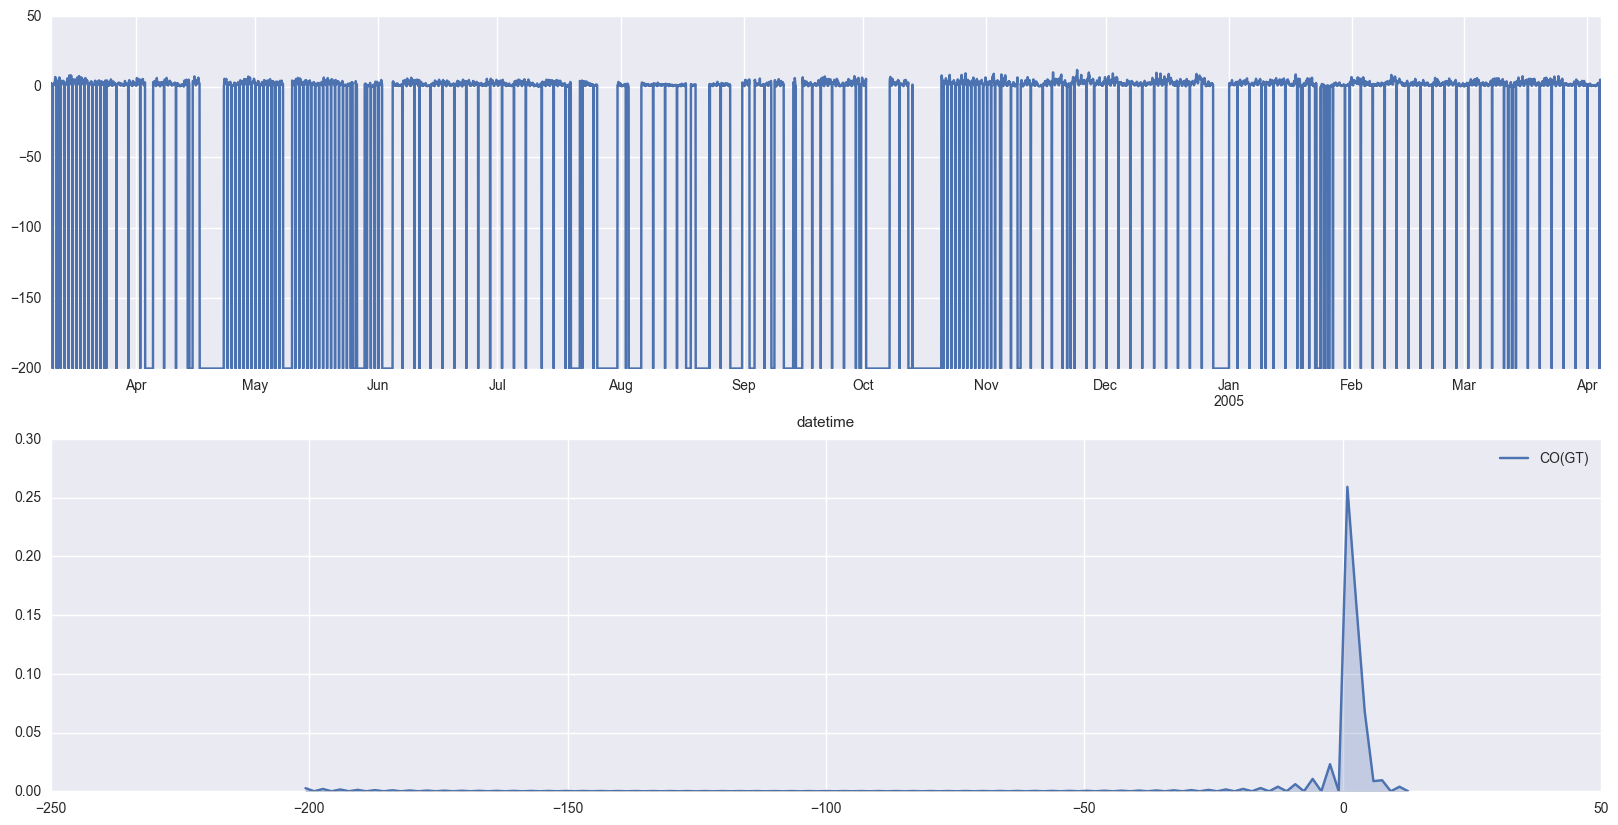

In [3]:
%matplotlib inline
# Plot the time series
sns.set(color_codes=True)

# Create chart area
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

# Plot the CO(GT) column -- Hourly averaged concentration CO
series = air_quality_ts['CO(GT)']

# Plot both continuous line
series.plot(ax=ax[0])
# And the kernel density distribution
sns.kdeplot(series, shade=True, ax=ax[1])

## Reading

The plot seems to suggest that the distribution is bipolar -- the normal range mostly lies between [0, ~10] and abnormal range is indicated with a -200.

## Separating the outliers

Let us use simple three sigma measure to separate the outliers

### Two sigma method

If you see the https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule, it suggests that most of all normal values lie within the furst two standard deviations of the mean. Anything outside these "normal" distributions is perhaps a outlier.

,CO(GT),is_outlier
datetime,,
2004-03-11 04:00:00,-200.0,True
2004-03-12 04:00:00,-200.0,True
2004-03-12 09:00:00,-200.0,True
2004-03-13 04:00:00,-200.0,True
2004-03-14 04:00:00,-200.0,True
...,...,...
2005-03-23 04:00:00,-200.0,True
2005-03-26 04:00:00,-200.0,True
2005-03-29 04:00:00,-200.0,True


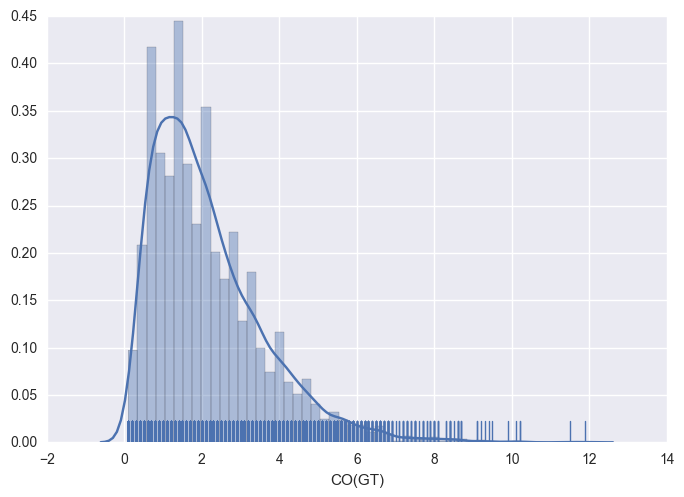

In [11]:
from scipy import stats
# Convert our original values into a dataframe
co_df = series.to_frame()

# Compute a column where the (absolute) deviation of value is beyond two standard deviations away
co_df['is_outlier'] = (np.abs(stats.zscore(co_df['CO(GT)'])) > 2)

# Show abnormal/outlier values
display(co_df[co_df.is_outlier])

# Also plot "normal" values for visually cleaner dataset

good_values = co_df[~co_df.is_outlier]['CO(GT)']
sns.distplot(good_values, rug=True, hist=True)

# Check for normality of the good values to make sure we may now do parametric tests
display(HTML("<h3>The dataset is {0} normal</h3>".format("NOT" if stats.mstats.normaltest(good_values)[1] < 0.05 else "")))

## Findings

It seems to suggest from (preview of the dataframe) that the sensor is misbehaving at 4AM in the morning usually. Something to consider?

Moreover, it looks the data is not really "normally" distributed. It seems to be skewed. What distribution is this sensor exhibiting? 

In [10]:
# Create a function to run ks test against all known distributions
from math import log
def run_dist_test(x, cdf):
    #fit our data set against every probability distribution
    dist = getattr(stats, cdf)
    #estimate the parameters for known samples -- aka mean, variance, skew etc
    params = dist.fit(good_values)
    # apply the Kolmogorov Smirnov test
    (D, p) = stats.kstest(x, cdf, args=params)
    # if the distribution is significant return the D values else pass null
    return log(p) if not np.isnan(p) and p <= 0.05 and p > 0 else None

# Get all known distributions from the web
cdfs = pd.read_html('https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html')[1][0].to_frame('cdf')

# Evaluate the distribution
cdfs['log_pvalue'] = cdfs['cdf'].apply(lambda cdf: run_dist_test(good_values, cdf))

# Display the preview of the cdf evaluations
display(cdfs.dropna().sort_values('log_pvalue'))

,cdf,log_pvalue
0,alpha,-687.746586
41,halfgennorm,-497.492055
9,chi2,-482.453093
14,expon,-417.023768
38,halfcauchy,-395.506953
...,...,...
18,f,-8.551020
3,beta,-8.511694
64,pearson3,-8.502500
13,erlang,-8.501449


## Alpha Distribution

Here is how the alpha distribution looks.

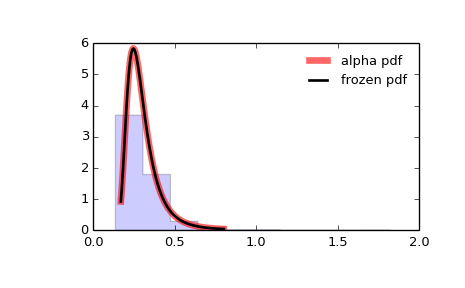

In [12]:
Image('https://docs.scipy.org/doc/scipy-0.16.1/reference/_images/scipy-stats-alpha-1.png')

<hr />